In [1]:
# import the necessary libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Floats (decimal numbers) should be displayed rounded with 2 decimal places
pd.options.display.float_format = "{:,.2f}".format
# Set style for plots
plt.style.use('fivethirtyeight') 

In [4]:
df = pd.read_csv(r"E:\Git\Portofolio\Data\DE_youtube_trending_data.csv")
df.head(2)

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,KJi2qg5F-9E,Bonez MC - HOLLYWOOD (Snippet),2020-08-11T18:00:03Z,UCGh8tmH9x9njaI2mXfh2fyg,CrhymeTV,10,2020-08-12T00:00:00Z,187|187 Strassenbande|BONEZ MC|RAF Camora|MAXW...,573902,69319,970,3311,https://i.ytimg.com/vi/KJi2qg5F-9E/default.jpg,False,False,Hollywood Fanbox vorbestellen ► http://bonezmc...
1,K0vYnOn7wZI,Nik hat heftige Probleme in Köln! 😱😫 #1925 | K...,2020-08-11T17:00:09Z,UCnrvUg5MJWPDSrv_voT7AqA,Köln 50667,24,2020-08-12T00:00:00Z,Köln|50667|RTL2|RTL|Serie|k50667|ganze folge|t...,381375,13637,435,866,https://i.ytimg.com/vi/K0vYnOn7wZI/default.jpg,False,False,"Toni gerät in Panik, als plötzlich ein Unbekan..."


In [5]:
df.columns

Index(['video_id', 'title', 'publishedAt', 'channelId', 'channelTitle',
       'categoryId', 'trending_date', 'tags', 'view_count', 'likes',
       'dislikes', 'comment_count', 'thumbnail_link', 'comments_disabled',
       'ratings_disabled', 'description'],
      dtype='object')

In [6]:
df.shape

(111143, 16)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111143 entries, 0 to 111142
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   video_id           111143 non-null  object
 1   title              111143 non-null  object
 2   publishedAt        111143 non-null  object
 3   channelId          111143 non-null  object
 4   channelTitle       111143 non-null  object
 5   categoryId         111143 non-null  int64 
 6   trending_date      111143 non-null  object
 7   tags               111143 non-null  object
 8   view_count         111143 non-null  int64 
 9   likes              111143 non-null  int64 
 10  dislikes           111143 non-null  int64 
 11  comment_count      111143 non-null  int64 
 12  thumbnail_link     111143 non-null  object
 13  comments_disabled  111143 non-null  bool  
 14  ratings_disabled   111143 non-null  bool  
 15  description        108448 non-null  object
dtypes: bool(2), int64(5)

In [8]:
df.drop(['tags', 'thumbnail_link', 'comments_disabled', 'ratings_disabled', 'description', 'channelId'], axis=1, inplace=True)

In [9]:
df.head(2)

,video_id,title,publishedAt,channelTitle,categoryId,trending_date,view_count,likes,dislikes,comment_count
0,KJi2qg5F-9E,Bonez MC - HOLLYWOOD (Snippet),2020-08-11T18:00:03Z,CrhymeTV,10,2020-08-12T00:00:00Z,573902,69319,970,3311
1,K0vYnOn7wZI,Nik hat heftige Probleme in Köln! 😱😫 #1925 | K...,2020-08-11T17:00:09Z,Köln 50667,24,2020-08-12T00:00:00Z,381375,13637,435,866


In [10]:
# check for duplicate rows in video_id column
df["video_id"].duplicated().value_counts()

True     84822
False    26321
Name: video_id, dtype: int64

So we have data on 111143 trending videos to analyze. On YouTube, the same video might appear on the trending list for many days. This means that the 111143 videos are not unique videos. In fact, among the 111143 videos, we have 26321 unique videos.
These duplicate rows exist, since some of the videos stayed on the trending list for more than one day.

In [11]:
# convert trending_date and publish_time into datetime and extract date part from publish_time
# format specifies the present form of our argument we pass into the function
df['trending_date'] = pd.to_datetime(df['trending_date'], format='%Y-%m-%dT%H:%M:%S%fZ')
df['publishedAt'] = pd.to_datetime(df['publishedAt'], format='%Y-%m-%dT%H:%M:%S%fZ')
df['publishedAt'] = pd.to_datetime(df['publishedAt'].dt.date)

In [12]:
df.head(2)

,video_id,title,publishedAt,channelTitle,categoryId,trending_date,view_count,likes,dislikes,comment_count
0,KJi2qg5F-9E,Bonez MC - HOLLYWOOD (Snippet),2020-08-11,CrhymeTV,10,2020-08-12,573902,69319,970,3311
1,K0vYnOn7wZI,Nik hat heftige Probleme in Köln! 😱😫 #1925 | K...,2020-08-11,Köln 50667,24,2020-08-12,381375,13637,435,866


In [13]:
# extract year, month, day of week and hour information out of column publishedAt and build new column for each
df["publish_year"]=df["publishedAt"].dt.year
df["publish_month"]=df["publishedAt"].dt.month
df["publish_weekday"]=df["publishedAt"].dt.dayofweek
df["publish_hour"]=df["publishedAt"].dt.hour

In [14]:
df.head(2)

,video_id,title,publishedAt,channelTitle,categoryId,trending_date,view_count,likes,dislikes,comment_count,publish_year,publish_month,publish_weekday,publish_hour
0,KJi2qg5F-9E,Bonez MC - HOLLYWOOD (Snippet),2020-08-11,CrhymeTV,10,2020-08-12,573902,69319,970,3311,2020,8,1,0
1,K0vYnOn7wZI,Nik hat heftige Probleme in Köln! 😱😫 #1925 | K...,2020-08-11,Köln 50667,24,2020-08-12,381375,13637,435,866,2020,8,1,0


In [15]:
# extract year, month, day-of-week out of column trending_date and build new column for each
df["trending_year"]=df["trending_date"].dt.year
df["trending_month"]=df["trending_date"].dt.month
df["trending_weekday"]=df["trending_date"].dt.dayofweek

In [16]:
df.head(2)

,video_id,title,publishedAt,channelTitle,categoryId,trending_date,view_count,likes,dislikes,comment_count,publish_year,publish_month,publish_weekday,publish_hour,trending_year,trending_month,trending_weekday
0,KJi2qg5F-9E,Bonez MC - HOLLYWOOD (Snippet),2020-08-11,CrhymeTV,10,2020-08-12,573902,69319,970,3311,2020,8,1,0,2020,8,2
1,K0vYnOn7wZI,Nik hat heftige Probleme in Köln! 😱😫 #1925 | K...,2020-08-11,Köln 50667,24,2020-08-12,381375,13637,435,866,2020,8,1,0,2020,8,2


In [17]:
# create dictionary called category_names with categoryId as key and the actual category name as value
# we get these values from the Google API or here: https://gist.github.com/dgp/1b24bf2961521bd75d6c
category_names = {
    1:'Film and Animation',
    2:'Autos & Vehicles',
    10:'Music',
    15:'Pets and Animals',
    17:'Sports',
    18:'Short Movies',
    19:'Travel and Events',
    20:'Gaming',
    21:'Videoblogging',
    22:'People and Blogs',
    23:'Comedy',
    24:'Entertainment',
    25:'News and Politics',
    26:'How to and Style',
    27:'Education',
    28:'Science and Technology',
    29:'Non Profits and Activism',
    30:'Movies',
    31:'Anime/Animation', 
    32:'Action/Adventure',
    33:'Classics',
    34:'Comedy', 
    35:'Documentary',
    36:'Drama',
    37:'Family',
    38:'Foreign',
    39:'Horror',
    40:'Sci-Fi/Fantasy',
    41:'Thriller',
    42:'Shorts',
    43:'Shows',
    44:'Trailers'
    }

In [18]:
# create new column called category_name which contains the name of the category, the video belongs to
# the map() function is used to map values of Series according to input correspondence (https://www.w3resource.com/pandas/series/series-map.php)
df['category_name'] = df['categoryId'].map(category_names)

In [19]:
df[["title", "categoryId", "category_name"]].head(2)

,title,categoryId,category_name
0,Bonez MC - HOLLYWOOD (Snippet),10,Music
1,Nik hat heftige Probleme in Köln! 😱😫 #1925 | K...,24,Entertainment


In [20]:
# create new column called trending_days_difference
df['trending_days_difference']=(df["trending_date"]-df["publishedAt"]).dt.days

In [21]:
df[["trending_date", "publishedAt", "trending_days_difference"]].head(2)

,trending_date,publishedAt,trending_days_difference
0,2020-08-12,2020-08-11,1
1,2020-08-12,2020-08-11,1


In [22]:
# displays sum of missing values per column
df.isnull().sum()

video_id                    0
title                       0
publishedAt                 0
channelTitle                0
categoryId                  0
trending_date               0
view_count                  0
likes                       0
dislikes                    0
comment_count               0
publish_year                0
publish_month               0
publish_weekday             0
publish_hour                0
trending_year               0
trending_month              0
trending_weekday            0
category_name               0
trending_days_difference    0
dtype: int64

In [23]:
# the describe() function gives you a good overview
df[["view_count", "likes", "dislikes", "comment_count", "trending_days_difference", "publish_hour"]].describe()

,view_count,likes,dislikes,comment_count,trending_days_difference,publish_hour
count,"111,143.00","111,143.00","111,143.00","111,143.00","111,143.00","111,143.00"
mean,"1,736,255.50","99,355.46","2,117.75","7,954.64",3.18,0.00
std,"5,859,404.83","364,590.93","10,777.41","79,034.21",2.14,0.00
min,0.00,0.00,0.00,0.00,0.00,0.00
25%,"120,751.00","5,766.00",70.00,337.00,2.00,0.00
50%,"309,488.00","15,853.00",244.00,907.00,3.00,0.00
75%,"1,060,117.00","54,586.00",912.00,"3,078.00",4.00,0.00
max,"219,110,491.00","15,460,845.00","848,975.00","5,987,755.00",34.00,0.00


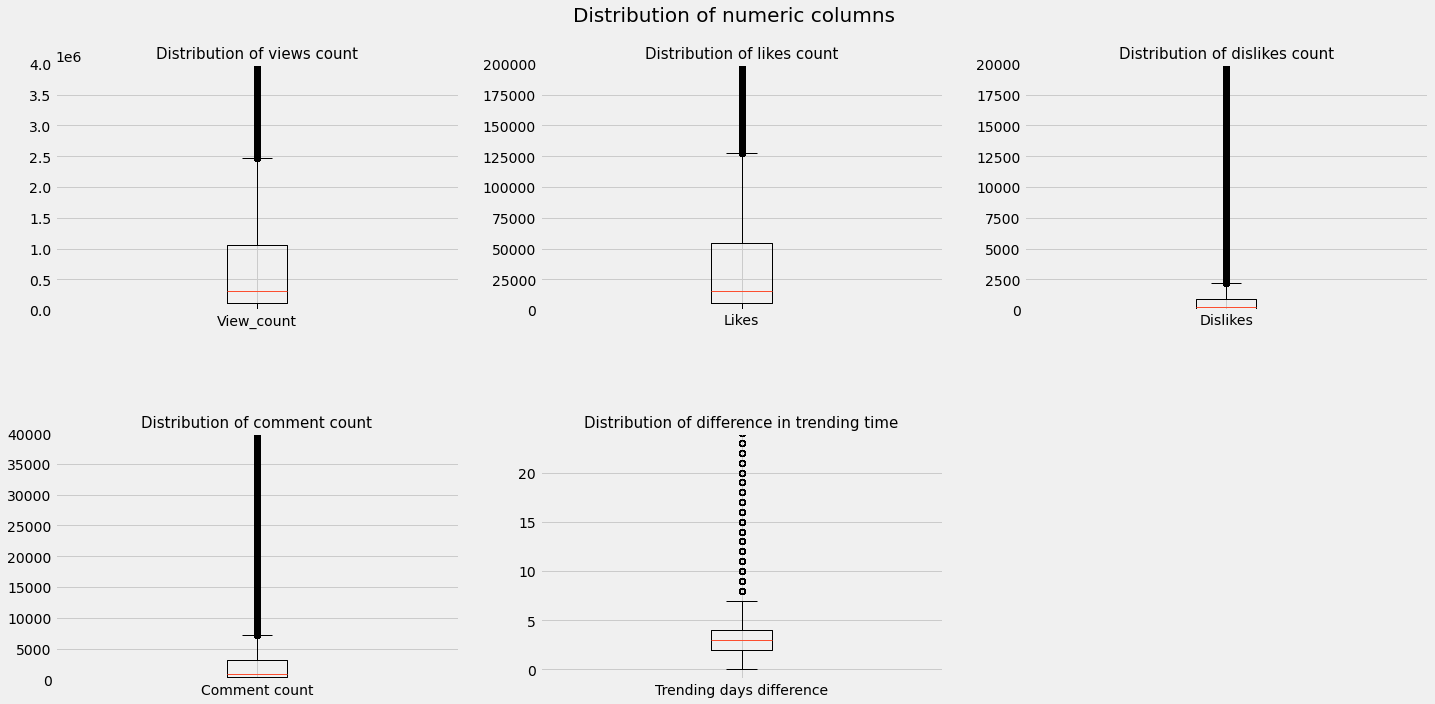

In [24]:
fig, ax = plt.subplots(2,3, figsize=(20,10)) # create subplots on 2 rows and 3 columns
plt.suptitle('Distribution of numeric columns', fontsize=20)
fig.tight_layout() # tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area
plt.subplots_adjust(hspace = .5, wspace = .2, top = .9) # adjusts the space between the single subplots

ax[0][0].boxplot(x = df['view_count']) # creates boxplot for number of views
ax[0][0].set_xticklabels(labels=["View_count"]) # sets the label for the ticks on the x-axis
ax[0][0].set_ylim(0,4000000) # limits the y-axis values from 0 to 4000000 
ax[0][0].set_title("Distribution of views count", fontsize = 15); # sets title for subplot

ax[0][1].boxplot(x = df['likes'])
ax[0][1].set_xticklabels(labels=["Likes"])
ax[0][1].set_ylim(0,200000)
ax[0][1].set_title("Distribution of likes count", fontsize = 15);

ax[0][2].boxplot(x = df['dislikes'])
ax[0][2].set_xticklabels(labels=["Dislikes"])
ax[0][2].set_ylim(0,20000)
ax[0][2].set_title("Distribution of dislikes count", fontsize = 15);

ax[1][0].boxplot(x = df['comment_count'])
ax[1][0].set_xticklabels(labels=["Comment count"])
ax[1][0].set_ylim(0,40000)
ax[1][0].set_title("Distribution of comment count", fontsize = 15);
                              
ax[1][1].boxplot(x = df['trending_days_difference'])
ax[1][1].set_xticklabels(labels=["Trending days difference"])
ax[1][1].set_ylim(-1,24)
ax[1][1].set_title("Distribution of difference in trending time", fontsize = 15);

fig.delaxes(ax[1][2]);

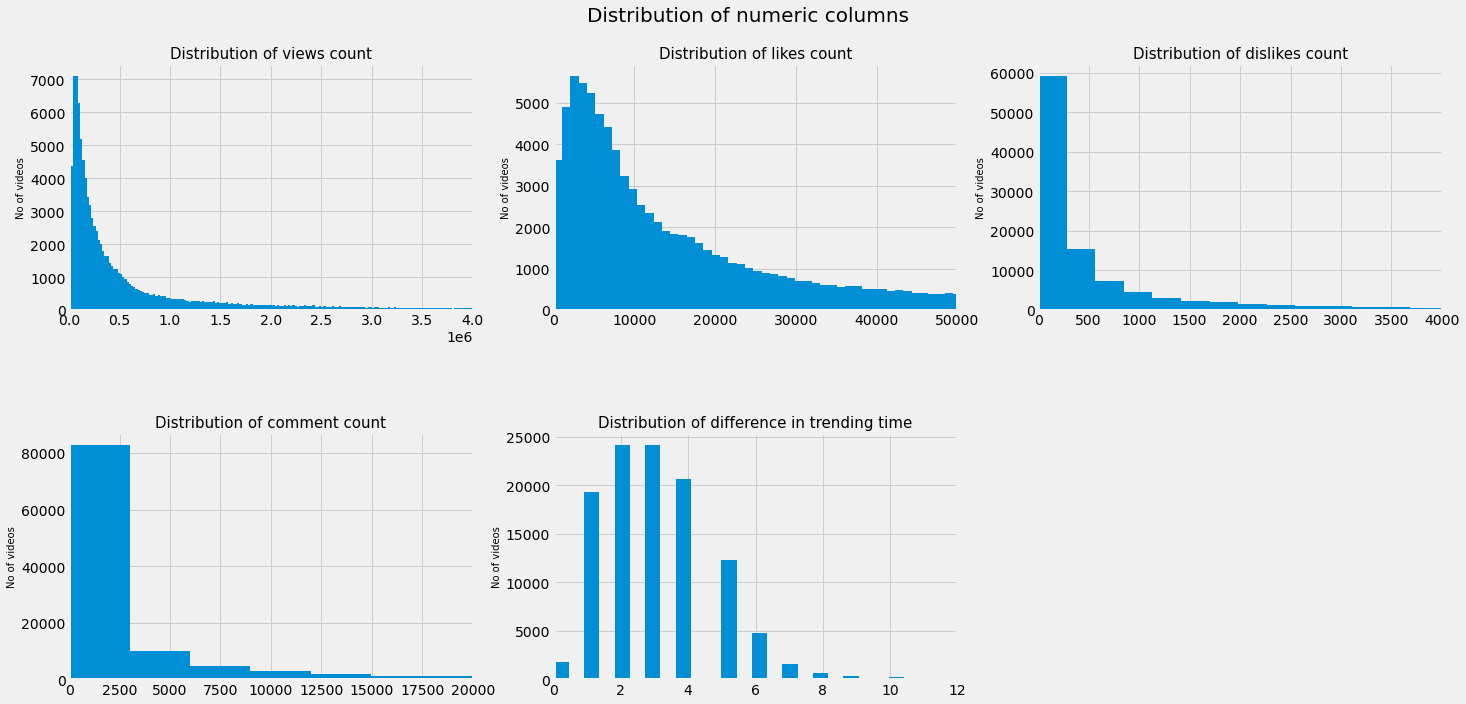

In [25]:
fig, ax = plt.subplots(2,3, figsize=(20,10)) # create subplots on 2 rows and 3 columns
plt.suptitle('Distribution of numeric columns', fontsize=20)
fig.tight_layout() # tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area
plt.subplots_adjust(hspace = .5, wspace = .2, top = .9) # adjusts the space between the single subplots

ax[0][0].hist(x=df['view_count'], bins=10000)  # creates histogram for number of views
ax[0][0].set_ylabel("No of videos", fontsize = 10) # sets the label y-axis
ax[0][0].set_xlim(0,4000000) # limits the x-axis values from 0 to 4000000 
ax[0][0].set_title("Distribution of views count", fontsize = 15);  # sets title for subplot

ax[0][1].hist(x= df['likes'], bins=15000)
ax[0][1].set_ylabel("No of videos", fontsize = 10)
ax[0][1].set_xlim(0,50000)
ax[0][1].set_title("Distribution of likes count", fontsize = 15);

ax[0][2].hist(x=df['dislikes'], bins=3000)
ax[0][2].set_ylabel("No of videos", fontsize = 10)
ax[0][2].set_xlim(0,4000)
ax[0][2].set_title("Distribution of dislikes count", fontsize = 15);

ax[1][0].hist(x=df['comment_count'], bins=2000)
ax[1][0].set_ylabel("No of videos", fontsize = 10)
ax[1][0].set_xlim(0,20000)
ax[1][0].set_title("Distribution of comment count", fontsize = 15);
                              
ax[1][1].hist(x=df['trending_days_difference'], bins=75)
ax[1][1].set_ylabel("No of videos", fontsize = 10)
ax[1][1].set_xlim(0,12)
ax[1][1].set_title("Distribution of difference in trending time", fontsize = 15);

fig.delaxes(ax[1][2]);

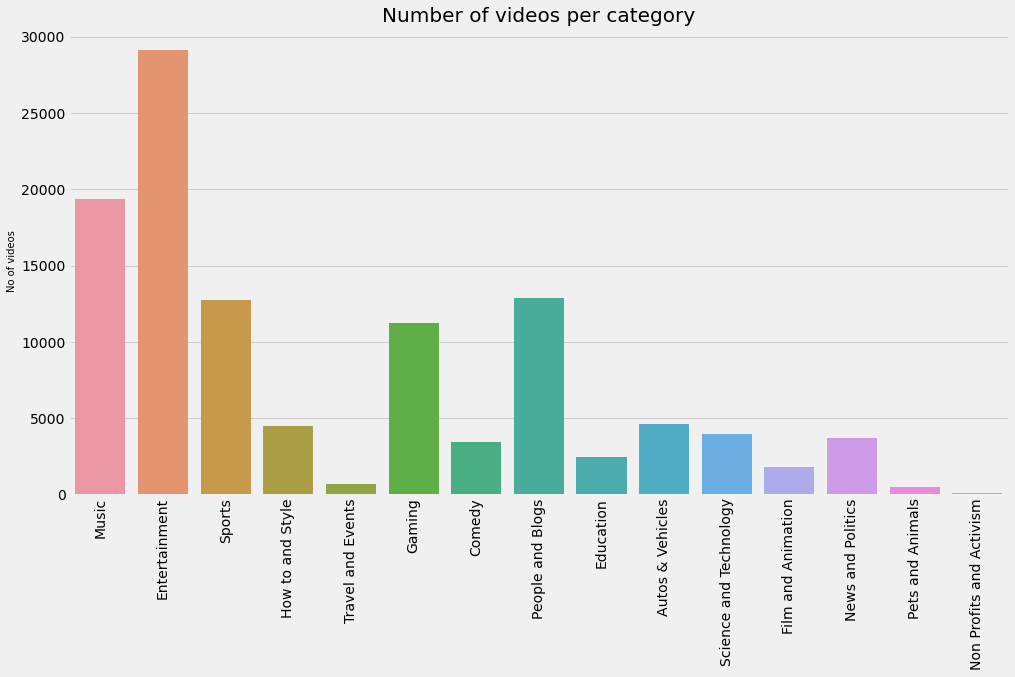

In [26]:
#Hypotheses 1 : for certain categories it takes longer to become a trending video after publication than for other categories

plt.figure(figsize=(15,8)) # specify figure size
f1 = sns.countplot(x=df['category_name']) # create countplot
f1.tick_params(axis='x', rotation=90) # get x-ticks and rotate them
f1.set(xlabel=None) # set no label for x-axis 
f1.set_ylabel("No of videos", fontsize = 10); # set label for y-axis
f1.set_title('Number of videos per category', fontsize=20); # set title

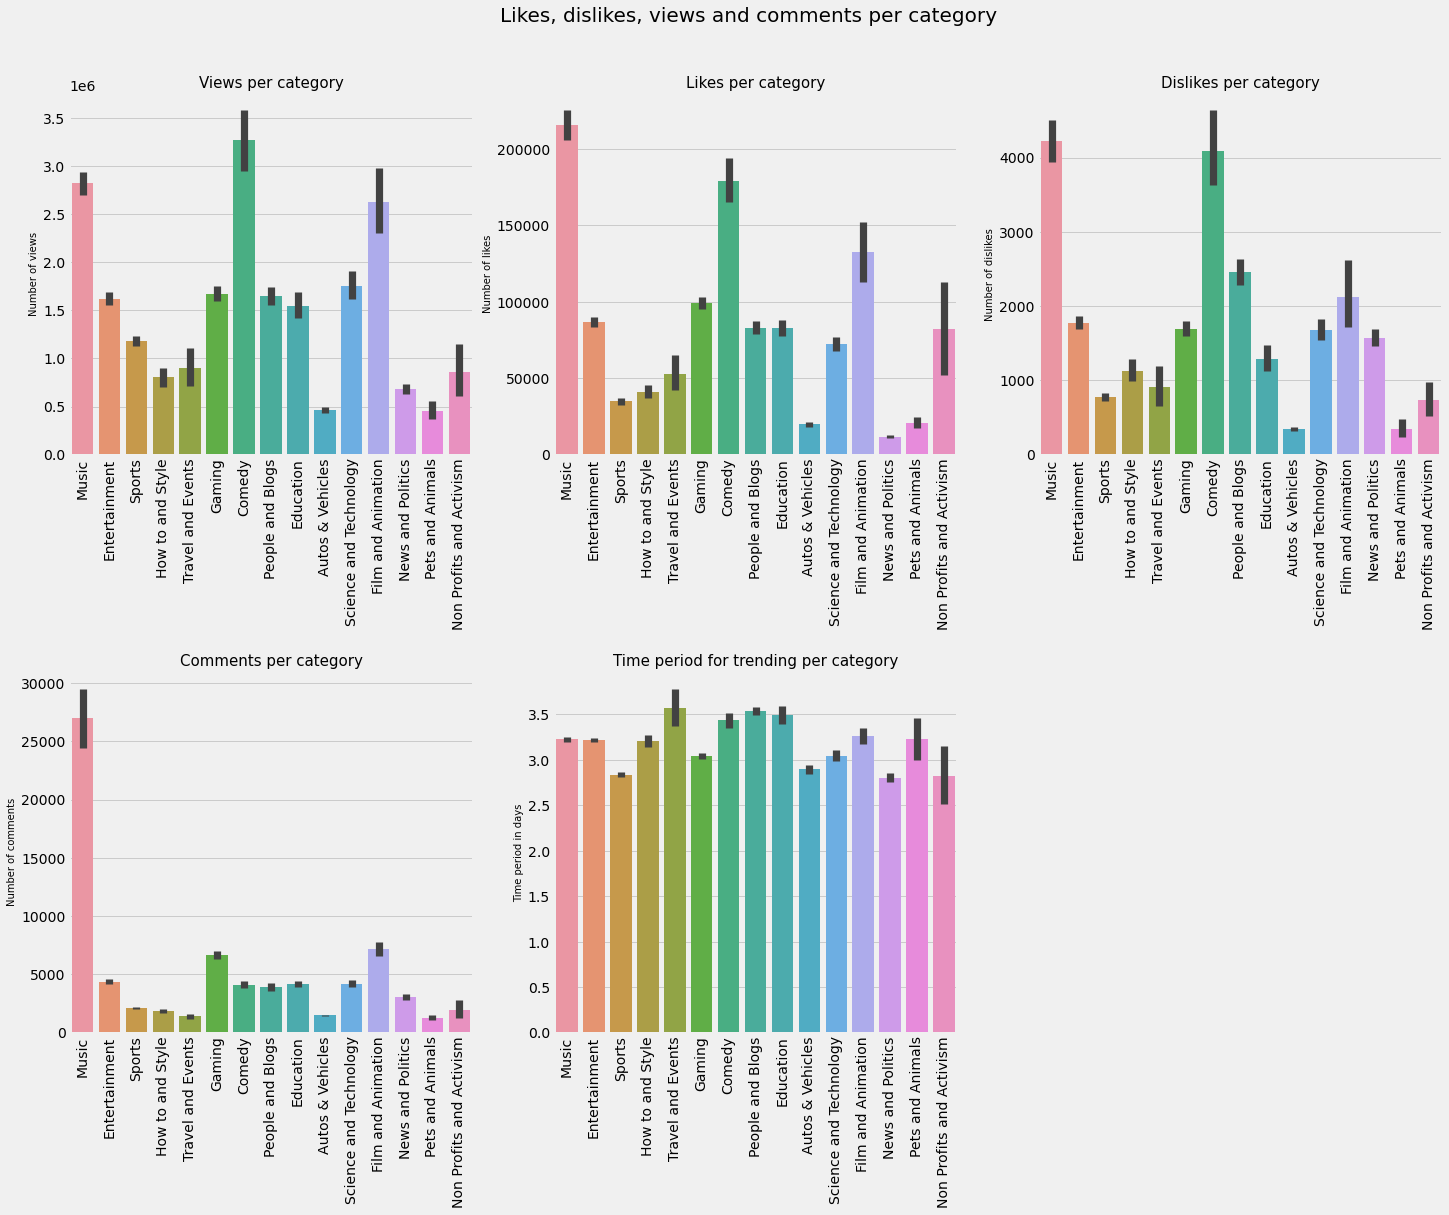

In [27]:
# Plot views, likes, dislikes and comments per category
fig, ax = plt.subplots(2,3, figsize=(20,15)) # create subplots on 2 rows and 2 columns
plt.suptitle('Likes, dislikes, views and comments per category', fontsize=20) 
fig.tight_layout()   # tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area
plt.subplots_adjust(hspace = .6, wspace = .2, top = .9) # adjusts the space between the single subplots

f1 = sns.barplot(x=df["category_name"], y = df['view_count'], ax=ax[0,0]) # creates barchart for number of views
f1.tick_params(axis='x', labelrotation=90) # sets the label y-axis
f1.set(xlabel=None) # sets the x-axis label
f1.set_ylabel("Number of views", fontsize = 10) # limits the x-axis values from 0 to 1000000
f1.set_title("Views per category", fontsize = 15);  # sets title for subplot

f2= sns.barplot(x=df["category_name"], y = df['likes'], ax=ax[0,1])
f2.tick_params(axis='x', labelrotation=90)
f2.set(xlabel=None)
f2.set_ylabel("Number of likes", fontsize = 10)
f2.set_title("Likes per category", fontsize = 15);

f3 = sns.barplot(x=df["category_name"], y = df['dislikes'], ax=ax[0,2])
f3.tick_params(axis='x', labelrotation=90)
f3.set(xlabel=None)
f3.set_ylabel("Number of dislikes", fontsize = 10)
f3.set_title("Dislikes per category", fontsize = 15);

f4 = sns.barplot(x=df["category_name"], y = df['comment_count'], ax=ax[1,0])
f4.tick_params(axis='x', labelrotation=90)
f4.set(xlabel=None)
f4.set_ylabel("Number of comments", fontsize = 10)
f4.set_title("Comments per category", fontsize = 15);

f5 = sns.barplot(x=df["category_name"], y = df['trending_days_difference'], ax=ax[1,1])
f5.tick_params(axis='x', labelrotation=90)
f5.set(xlabel=None)
f5.set_ylabel("Time period in days", fontsize = 10)
f5.set_title("Time period for trending per category", fontsize = 15);

fig.delaxes(ax[1][2]);

In [28]:
# Hypotheses 2 - some YouTube channels are more successful than others

# Top5 channels across all categories
df['channelTitle'].value_counts().head()

JP Performance          938
Berlin - Tag & Nacht    900
Sky Sport HD            665
Köln 50667              645
tagesschau              546
Name: channelTitle, dtype: int64

In [29]:
# Top5 channels for category music
df.query("category_name == 'Music'")['channelTitle'].value_counts().head()

SMTOWN          201
LifeisPainTv    201
BANGTANTV       186
Samra           186
385idéal        179
Name: channelTitle, dtype: int64

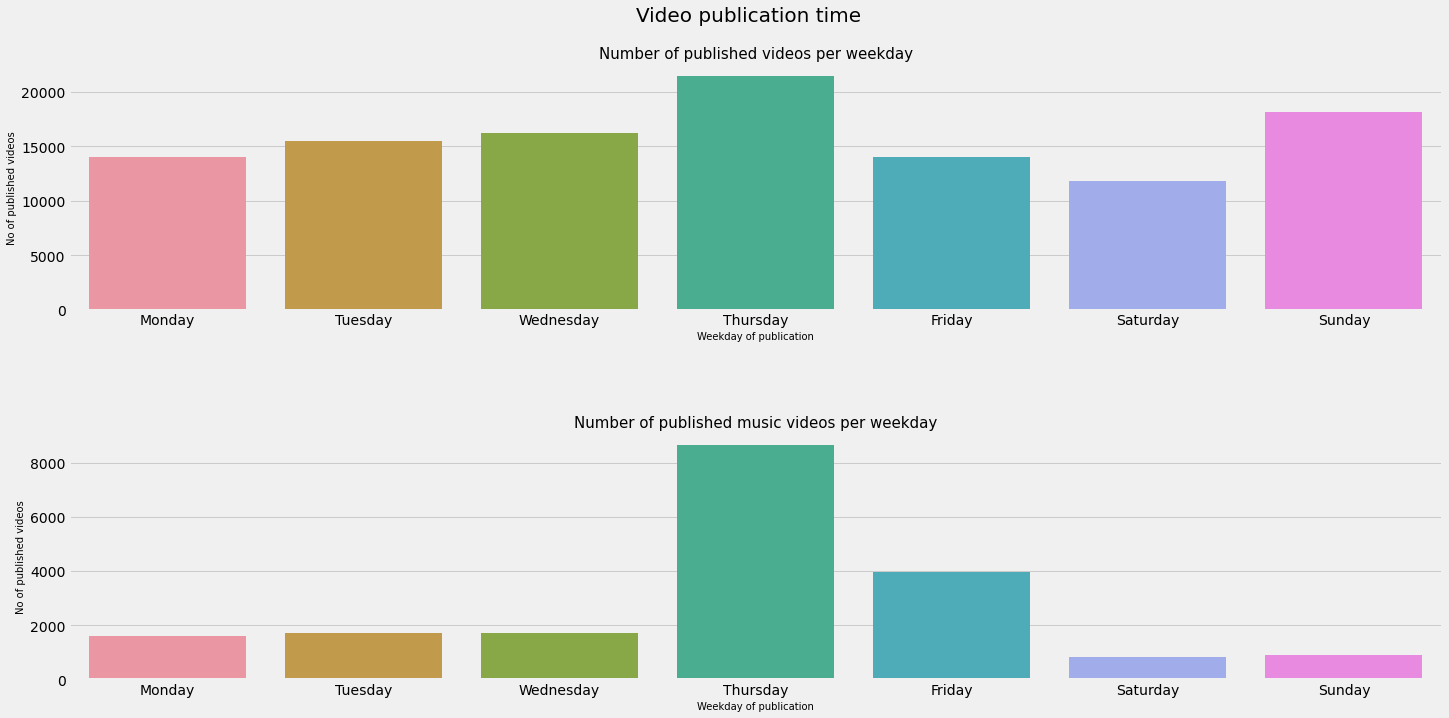

In [33]:
# Hypotheses 3 - the amount of video publications differ per day

fig, ax = plt.subplots(2,1, figsize=(20,10))
plt.suptitle('Video publication time', fontsize=20)
fig.tight_layout(h_pad=8) 
plt.subplots_adjust(hspace = .5, wspace = .2, top = .9)

f1 = sns.countplot(x=df['publish_weekday'], ax=ax[0])
f1.set_ylabel("No of published videos", fontsize = 10)
f1.set_xlabel("Weekday of publication", fontsize = 10)
f1.set_xticks([0,1,2,3,4,5,6])
f1.set_xticklabels(labels=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
f1.set_title("Number of published videos per weekday", fontsize = 15);

df_music = df.query("category_name == 'Music'")
f2 = sns.countplot(x=df_music['publish_weekday'], ax=ax[1])
f2.set_ylabel("No of published videos", fontsize = 10)
f2.set_xlabel("Weekday of publication", fontsize = 10)
f2.set_xticks([0,1,2,3,4,5,6])
f2.set_xticklabels(labels=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
f2.set_title("Number of published music videos per weekday", fontsize = 15);

In [34]:
# correlation matrix between these variables
corr_columns=["view_count", "likes", "dislikes", "comment_count", "trending_days_difference"]
corr_mtrx=df[corr_columns].corr()
corr_mtrx

,view_count,likes,dislikes,comment_count,trending_days_difference
view_count,1.00,0.84,0.68,0.51,0.23
likes,0.84,1.00,0.62,0.69,0.14
dislikes,0.68,0.62,1.00,0.51,0.14
comment_count,0.51,0.69,0.51,1.00,-0.00
trending_days_difference,0.23,0.14,0.14,-0.00,1.00


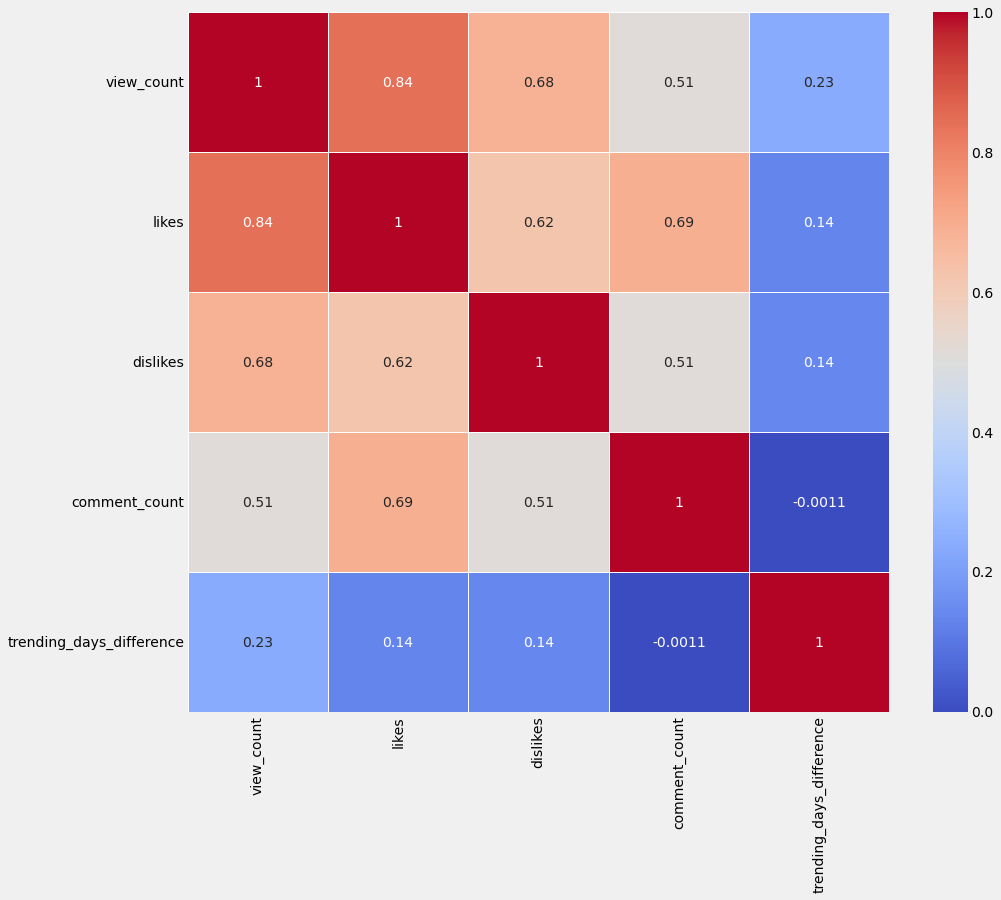

In [35]:
# draw the heatmap 
plt.figure(figsize = (14,12))
ax = sns.heatmap(corr_mtrx, linewidths=.5, annot=True, cmap='coolwarm')